In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import progressbar
import plotly.graph_objs as go
import numpy as np
import plotly as py
import cufflinks as cf
from wordcloud import WordCloud, STOPWORDS
from plotly.offline import init_notebook_mode,iplot
import re
import plotly.express as px
init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(offline=True,world_readable=True)
from IPython.display import Image

In [29]:
business=pd.read_json('E:\Yelp_dataset_business_clean.json')

In [30]:
business=business.dropna(subset=['categories'])
business
restaurant=business[business['categories'].str.contains('Restaurants')]

In [31]:
labels=['ON','AZ','NV','QC','OH','NC','PA','AB','WI']
good=restaurant[restaurant['stars']>=4]['state'].value_counts()
size1=[]
for i in range(len(good)):
    p=good.iloc[i]/sum(good.values)
    if p>0.01:
        size1.append(p*100)
#explode=(0.1,0.1,0,0,0,0,0,0,0)

In [32]:
bad=restaurant[restaurant['stars']<=2]['state'].value_counts()
size2=[]
for i in range(len(bad)):
    p=bad.iloc[i]/sum(bad.values)
    if p>0.01:
        size2.append(p*100)
size2.pop()

1.5189873417721518

In [33]:
review=pd.read_json('Yelp_dataset_review_clean.json')

In [34]:
review['user_id'].unique()

array(['4PFwh5zbgyPhTGRtxkSZZA', 'dvwFC5u09dbG_16AeNKBmQ',
       'Z6-ZsBP3DqfQNt2Xju6epA', ..., 'KEUHEu0zR6kEH89P_Wlbhw',
       'zv51SeKf36N2jU84UFPCkw', 'pjj4Y76C7jHNpH4WOG6slQ'], dtype=object)

In [35]:
rest_5=restaurant[restaurant['stars']==4]
rest_5

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
63,ZkzutF0P_u0C0yTulwaHkA,Lelulos Pizzeria,311 Unity Center Rd,Plum,PA,15239,40.489996,-79.779288,4.0,31,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Pizza","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
115,8Hvp1tYKiQbBgGIwkCRK5g,Tony's Family Restaurant,1515 W Pleasant Valley Rd,Parma,OH,44134,41.361185,-81.688755,4.0,60,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Coffee & Tea, Restaurants, Food, Breakfast & B...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
129,OGVHlFHSXjHuioOvm1wVqg,The Jackman Bar & Restaurant,918 Jackman Ave,Avalon,PA,15202,40.496381,-80.065479,4.0,13,"{'BusinessParking': '{'garage': False, 'street...","Dive Bars, Restaurants, Comfort Food, Bars, Ni...","{'Monday': '11:30-2:0', 'Tuesday': '11:30-2:0'..."
157,Yr_w9lakJrKMyEG_hI6zbA,Fat Moe's Pizza & Wings,"6125 W Tropicana Ave, Ste F",Las Vegas,NV,89103,36.099361,-115.226636,4.0,141,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Pizza, Salad, Burgers, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209277,qWcaGio9JsqrvgmQiIRtIQ,Country Style Pizza,536 Dewey Ave,Bridgeville,PA,15017,40.356300,-80.110600,4.0,39,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Food, Restaurants, Bakeries, Pizza, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '..."
209281,8WIcKHx7of-pyj2C3CyuIg,Five Guys,9826 Gilead Rd,Huntersville,NC,28078,35.406267,-80.864353,4.0,31,"{'GoodForKids': 'True', 'RestaurantsGoodForGro...","Fast Food, Buffets, Restaurants, American (New...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209317,tv-WIUQifcp5J9pUKoiE3Q,Dragon Grille,,Las Vegas,NV,89119,36.076518,-115.153343,4.0,69,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Food, Asian Fusion, Food Trucks, Restaurants","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
209344,kPwYdRKp1-W1-tUR8iylxw,Aladdin's Eatery,4885 McKnight Rd,Ross Township,PA,15237,40.530338,-80.010495,4.0,94,"{'HasTV': 'False', 'RestaurantsPriceRange2': '...","Juice Bars & Smoothies, Mediterranean, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."


In [36]:
a=list(set(rest_5['business_id']))
a[0]

'GrJ74hxJsXXwcqS7zcfFhw'

In [37]:
b=list(review[review['business_id']==a[10]]['text'])

In [38]:
star=[1, 2, 3, 4, 5]
fig2=go.Figure()
avg_polarity=[]
for i in range(len(star)):    
    rest_5=restaurant[restaurant['stars']==star[i]]
    a=list(set(rest_5['business_id']))
    hh=[]
    for j in progressbar.progressbar(range(len(a))):
        b=list(review[review['business_id']==a[j]]['text'])
        polarity=[]
        for sentence in b:
            blob = TextBlob(sentence)
            polarity.append(blob.sentiment.polarity)
        if len(polarity)!=0:
            hh.append(sum(polarity)/len(polarity))
        ##if j==10:
          ##  break
    avg_polarity.append(sum(hh)/len(hh))
    print(avg_polarity)
    trace=go.Scatter(x=np.linspace(0,len(hh),num=len(hh)),y=hh,line_shape='spline',name='{} star'.format(str(star[i])))
    fig2.add_trace(trace)
    fig2.update_layout(title="Polarity of Reviews with Different Ratings",title_x=0.5,title_font_size=25,xaxis_title='i\'th restaurant',yaxis_title='Polarity')

100% (146 of 146) |######################| Elapsed Time: 0:00:24 Time:  0:00:24
N/A% (0 of 1524) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

[-0.10828829752180955]


100% (1524 of 1524) |####################| Elapsed Time: 0:04:27 Time:  0:04:27
  0% (1 of 3424) |                       | Elapsed Time: 0:00:00 ETA:   0:08:47

[-0.10828829752180955, 0.011458387500664616]


100% (3424 of 3424) |####################| Elapsed Time: 0:11:58 Time:  0:11:58
N/A% (0 of 5929) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

[-0.10828829752180955, 0.011458387500664616, 0.1584332674213792]


100% (5929 of 5929) |####################| Elapsed Time: 0:27:46 Time:  0:27:46
  0% (1 of 603) |                        | Elapsed Time: 0:00:00 ETA:   0:01:35

[-0.10828829752180955, 0.011458387500664616, 0.1584332674213792, 0.27984088559409276]


100% (603 of 603) |######################| Elapsed Time: 0:01:49 Time:  0:01:49


[-0.10828829752180955, 0.011458387500664616, 0.1584332674213792, 0.27984088559409276, 0.3634195039981566]


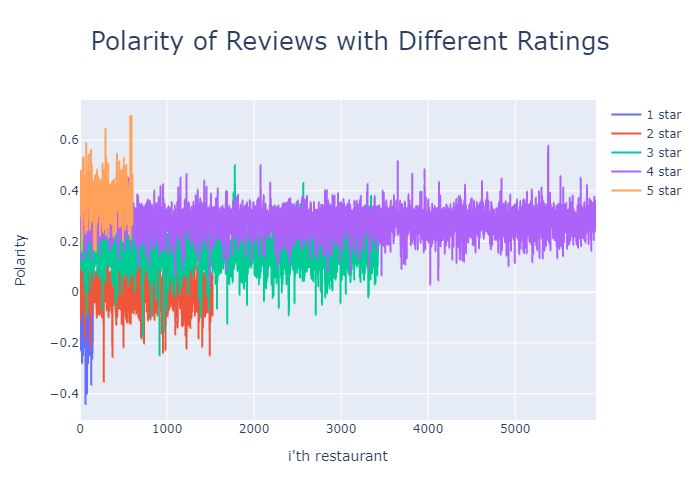

In [54]:
img_bytes = fig2.to_image(format="png")
Image(img_bytes)

In [39]:
star=[1, 2, 3, 4, 5]
fig1=go.Figure()
avg_subjectivity=[]
for i in range(len(star)):    
    rest_5=restaurant[restaurant['stars']==star[i]]
    a=list(set(rest_5['business_id']))
    hhh=[]
    for j in progressbar.progressbar(range(len(a))):
        b=list(review[review['business_id']==a[j]]['text'])
        subjectivity=[]
        for sentence in b:
            blob = TextBlob(sentence)
            subjectivity.append(blob.sentiment.subjectivity)
            #print(subjectivity)
        if len(subjectivity)!=0:
            hhh.append(sum(subjectivity)/len(subjectivity))
    avg_subjectivity.append(sum(hhh)/len(hhh))
    print(avg_subjectivity)
    trace=go.Scatter(x=np.linspace(0,len(hhh),num=len(hhh)),y=hhh,line_shape='spline',name='{} star'.format(str(star[i])))
    fig1.add_trace(trace)
    fig1.update_layout(title="subjectivity of different star rate",title_x=0.5,xaxis_title='i\'th of restaurants',yaxis_title='subjectivity')
fig1

100% (146 of 146) |######################| Elapsed Time: 0:00:23 Time:  0:00:23
  0% (1 of 1524) |                       | Elapsed Time: 0:00:00 ETA:   0:04:20

[0.5382312199576533]


100% (1524 of 1524) |####################| Elapsed Time: 0:04:37 Time:  0:04:37
  0% (1 of 3424) |                       | Elapsed Time: 0:00:00 ETA:   0:08:43

[0.5382312199576533, 0.5397069699369762]


100% (3424 of 3424) |####################| Elapsed Time: 0:12:11 Time:  0:12:11
N/A% (0 of 5929) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

[0.5382312199576533, 0.5397069699369762, 0.553405719831672]


100% (5929 of 5929) |####################| Elapsed Time: 0:28:25 Time:  0:28:25
N/A% (0 of 603) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

[0.5382312199576533, 0.5397069699369762, 0.553405719831672, 0.5754676462327201]


100% (603 of 603) |######################| Elapsed Time: 0:01:50 Time:  0:01:50


[0.5382312199576533, 0.5397069699369762, 0.553405719831672, 0.5754676462327201, 0.58887770185751]


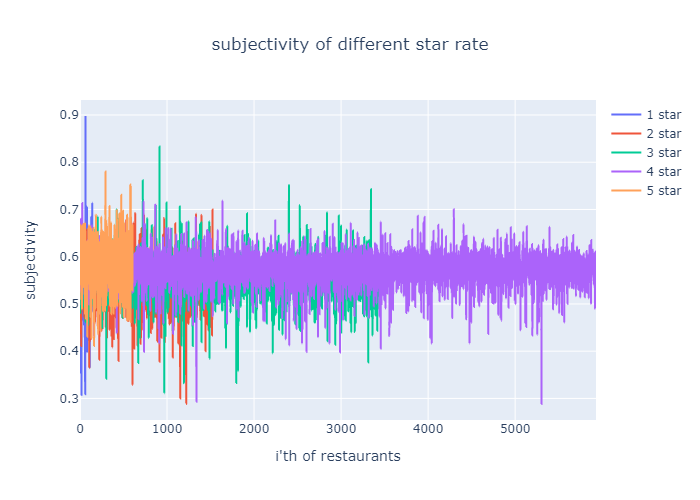

In [55]:
img_bytes = fig1.to_image(format="png")
Image(img_bytes)

100% (146 of 146) |######################| Elapsed Time: 0:00:22 Time:  0:00:22


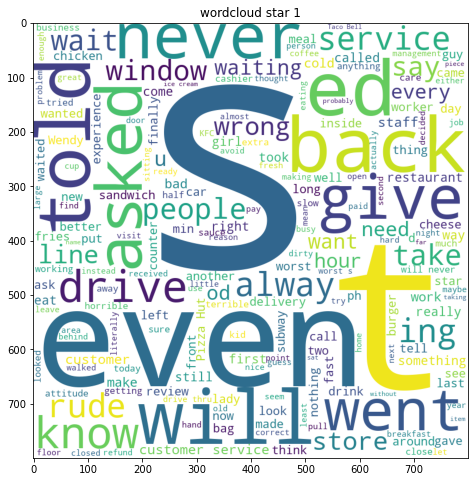

In [40]:
stopwords = set(STOPWORDS) 
stopwords
rest_5=restaurant[restaurant['stars']==star[0]]
a=list(set(rest_5['business_id']))
all_reviews=""
for i in progressbar.progressbar(range(len(a))):
    b=list(review[review['business_id']==a[i]]['text'])
    bs=""
    for s in b:
        bs+=s
    all_reviews+=bs
replace=["food","order","location","place","McDonald","one","time","go","minute","manager","said","pizza","employee","drive thru"];
for s in replace:
    all_reviews=all_reviews.replace(s,"")
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(all_reviews) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("wordcloud star 1")
plt.imshow(wordcloud) 

100% (1524 of 1524) |####################| Elapsed Time: 0:04:17 Time:  0:04:17


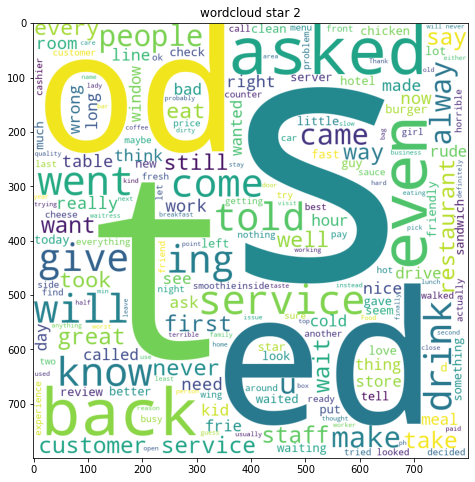

In [41]:
stopwords = set(STOPWORDS) 
stopwords
rest_5=restaurant[restaurant['stars']==star[1]]
a=list(set(rest_5['business_id']))
all_reviews=""
for i in progressbar.progressbar(range(len(a))):
    b=list(review[review['business_id']==a[i]]['text'])
    bs=""
    for s in b:
        bs+=s
    all_reviews+=bs
replace=["food","order","location","place","McDonald","one","time","go","minute","manager","said","pizza","employee","drive thru"];
for s in replace:
    all_reviews=all_reviews.replace(s,"")
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(all_reviews) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("wordcloud star 2")
plt.imshow(wordcloud)

100% (603 of 603) |######################| Elapsed Time: 0:01:39 Time:  0:01:39


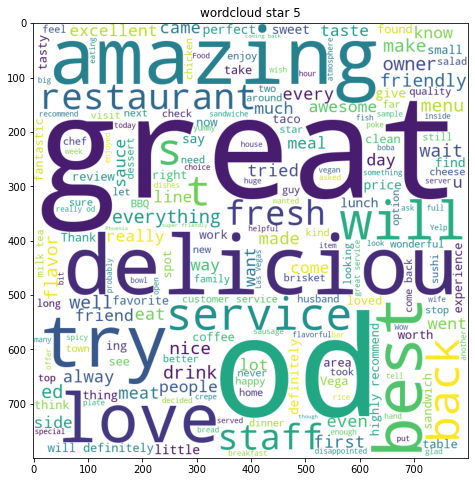

In [42]:
stopwords = set(STOPWORDS) 
stopwords
rest_5=restaurant[restaurant['stars']==star[4]]
a=list(set(rest_5['business_id']))
all_reviews=""
for i in progressbar.progressbar(range(len(a))):
    b=list(review[review['business_id']==a[i]]['text'])
    bs=""
    for s in b:
        bs+=s
    all_reviews+=bs
replace=["food","order","location","place","McDonald","one","time","go","minute","manager","said","pizza","employee","drive thru"];
for s in replace:
    all_reviews=all_reviews.replace(s,"")
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(all_reviews) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("wordcloud star 5")
plt.imshow(wordcloud) 

100% (3424 of 3424) |####################| Elapsed Time: 0:13:03 Time:  0:13:03


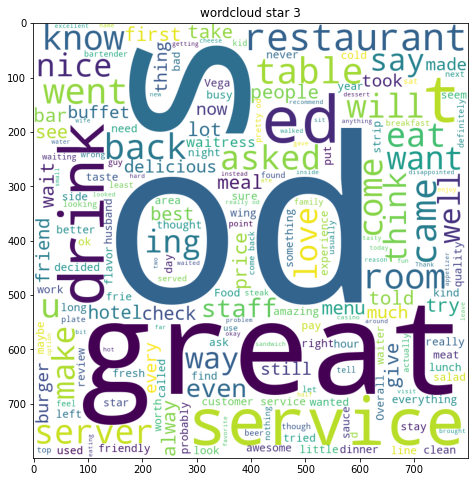

In [43]:
stopwords = set(STOPWORDS) 
stopwords
rest_5=restaurant[restaurant['stars']==star[2]]
a=list(set(rest_5['business_id']))
all_reviews=""
for i in progressbar.progressbar(range(len(a))):
    b=list(review[review['business_id']==a[i]]['text'])
    bs=""
    for s in b:
        bs+=s
    all_reviews+=bs
replace=["food","order","location","place","McDonald","one","time","go","minute","manager","said","pizza","employee","drive thru"];
for s in replace:
    all_reviews=all_reviews.replace(s,"")
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(all_reviews) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("wordcloud star 3")
plt.imshow(wordcloud) 

100% (5929 of 5929) |####################| Elapsed Time: 0:42:11 Time:  0:42:11


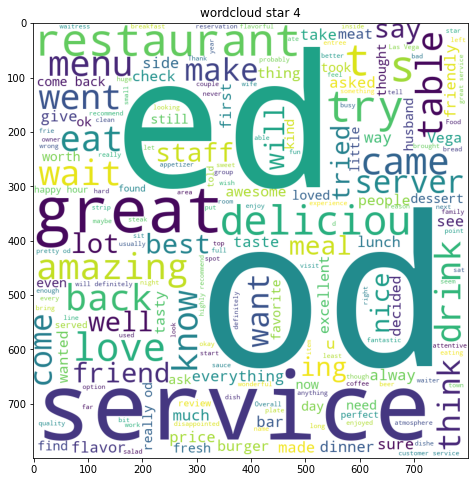

In [44]:
stopwords = set(STOPWORDS) 
stopwords
rest_5=restaurant[restaurant['stars']==star[3]]
a=list(set(rest_5['business_id']))
all_reviews=""
for i in progressbar.progressbar(range(len(a))):
    b=list(review[review['business_id']==a[i]]['text'])
    bs=""
    for s in b:
        bs+=s
    all_reviews+=bs
replace=["food","order","location","place","McDonald","one","time","go","minute","manager","said","pizza","employee","drive thru"];
for s in replace:
    all_reviews=all_reviews.replace(s,"")
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(all_reviews) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("wordcloud star 4")
plt.imshow(wordcloud) 